@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software} 
        }

In [1]:
# General-level imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Special-case libraries/modules
import piecewise_regression

# Personal/local libraries and module imports
import reg

In [2]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv"]

index = 0

df = pd.read_csv(f"{path}{filenames[index]}", parse_dates=True, index_col="TimeUTC")

In [3]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,E1,E2,E3,E4,E5,E6,E7,DT,PA
TimeUTC,,,,,,,,,,,,,,,,,,
2023-03-12 00:00:00,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,11.40,0.0,0.0,0.000,0.000,0.00,86.490453
2023-03-12 00:00:24,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0144,167.0,0.0,7.58,0.0,0.0,0.000,0.000,0.00,81.321720
2023-03-12 00:00:48,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0,0.627,0.000,0.00,69.690026
2023-03-12 00:01:12,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,112.0,17.6,0.00,0.0,0.0,0.313,0.000,0.00,70.727876
2023-03-12 00:01:36,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,55.8,0.0,0.00,0.0,0.0,0.000,0.000,0.00,68.520445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 23:58:00,61.2,7.14,3.95,3.42,1.590,0.000,0.142,0.0671,0.0144,7090.0,2200.0,865.00,325.0,10.5,0.314,0.000,1.29,100.899747
2023-03-14 23:58:24,24.5,14.30,9.88,5.70,1.590,0.954,0.142,0.0671,0.0000,5030.0,1920.0,819.00,309.0,21.0,0.000,0.088,1.12,84.530333
2023-03-14 23:58:48,61.2,21.40,9.89,2.28,1.590,0.000,0.142,0.0671,0.0000,6480.0,2360.0,895.00,262.0,16.8,0.314,0.000,1.46,95.456014


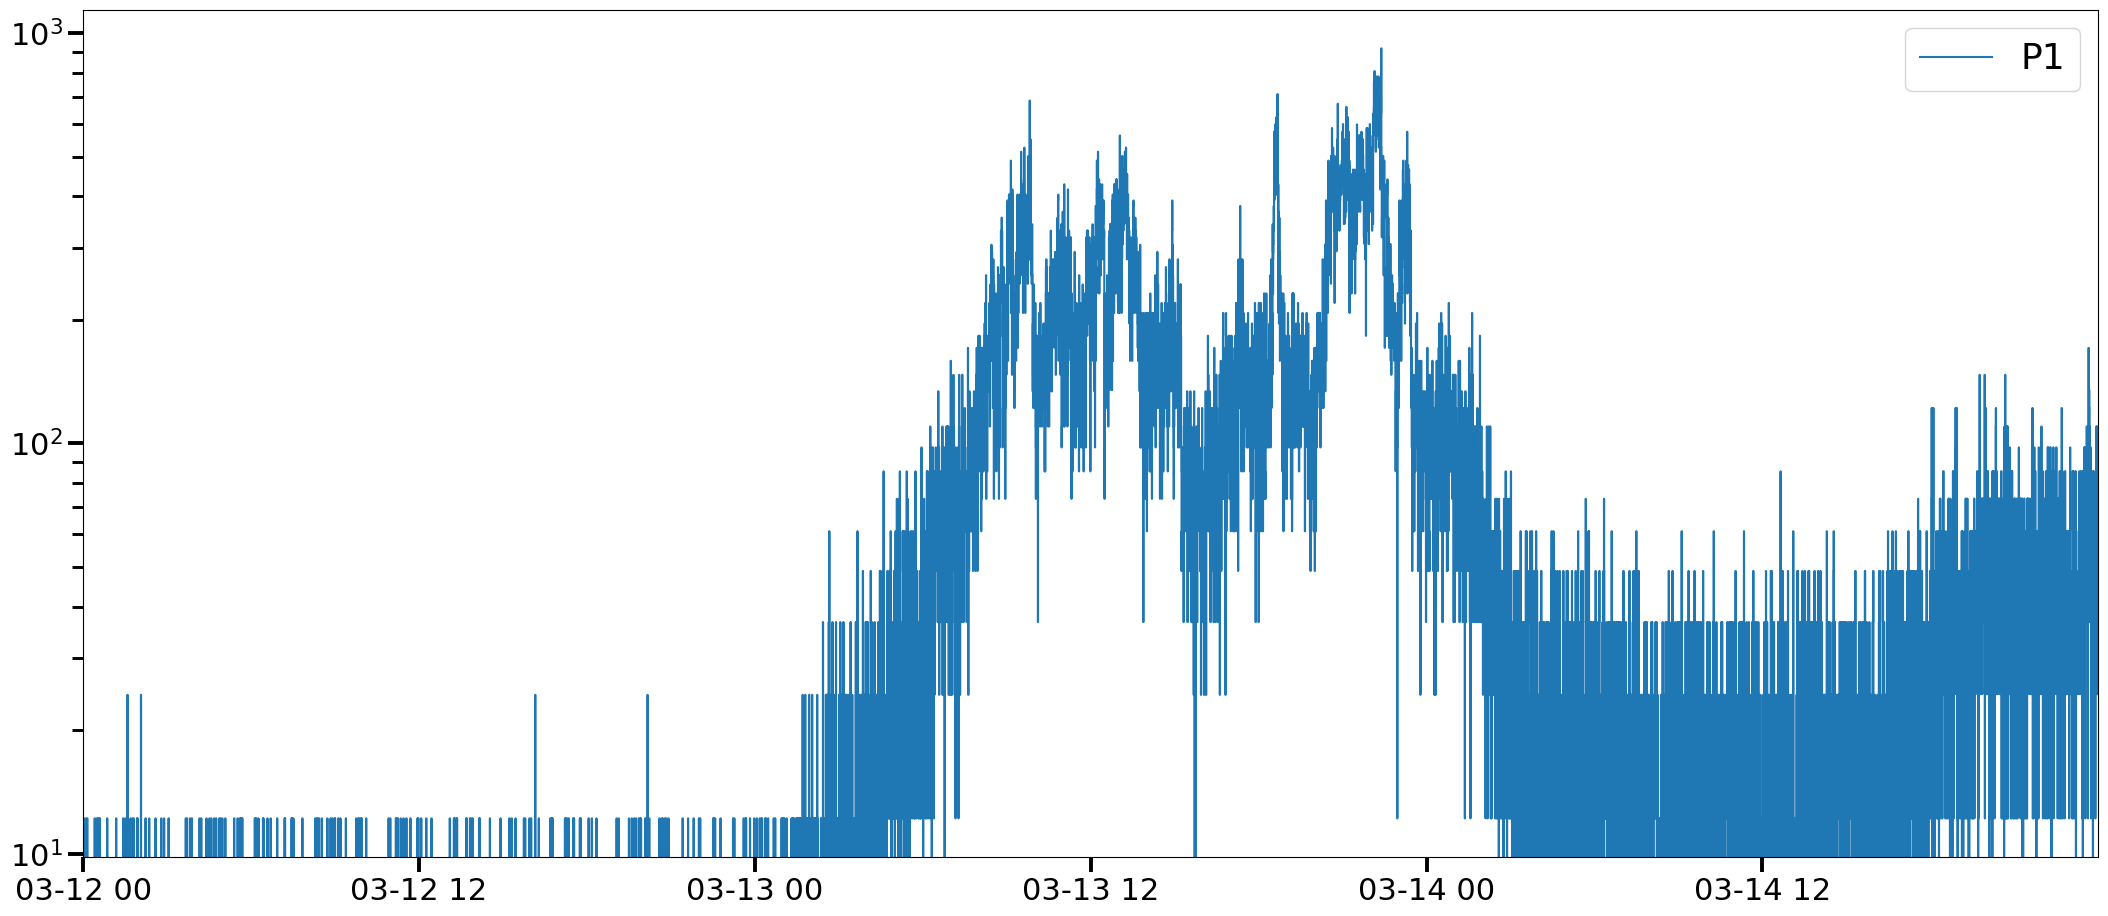

In [4]:
reg.quicklook(data=df, channel="P1", resample=None)

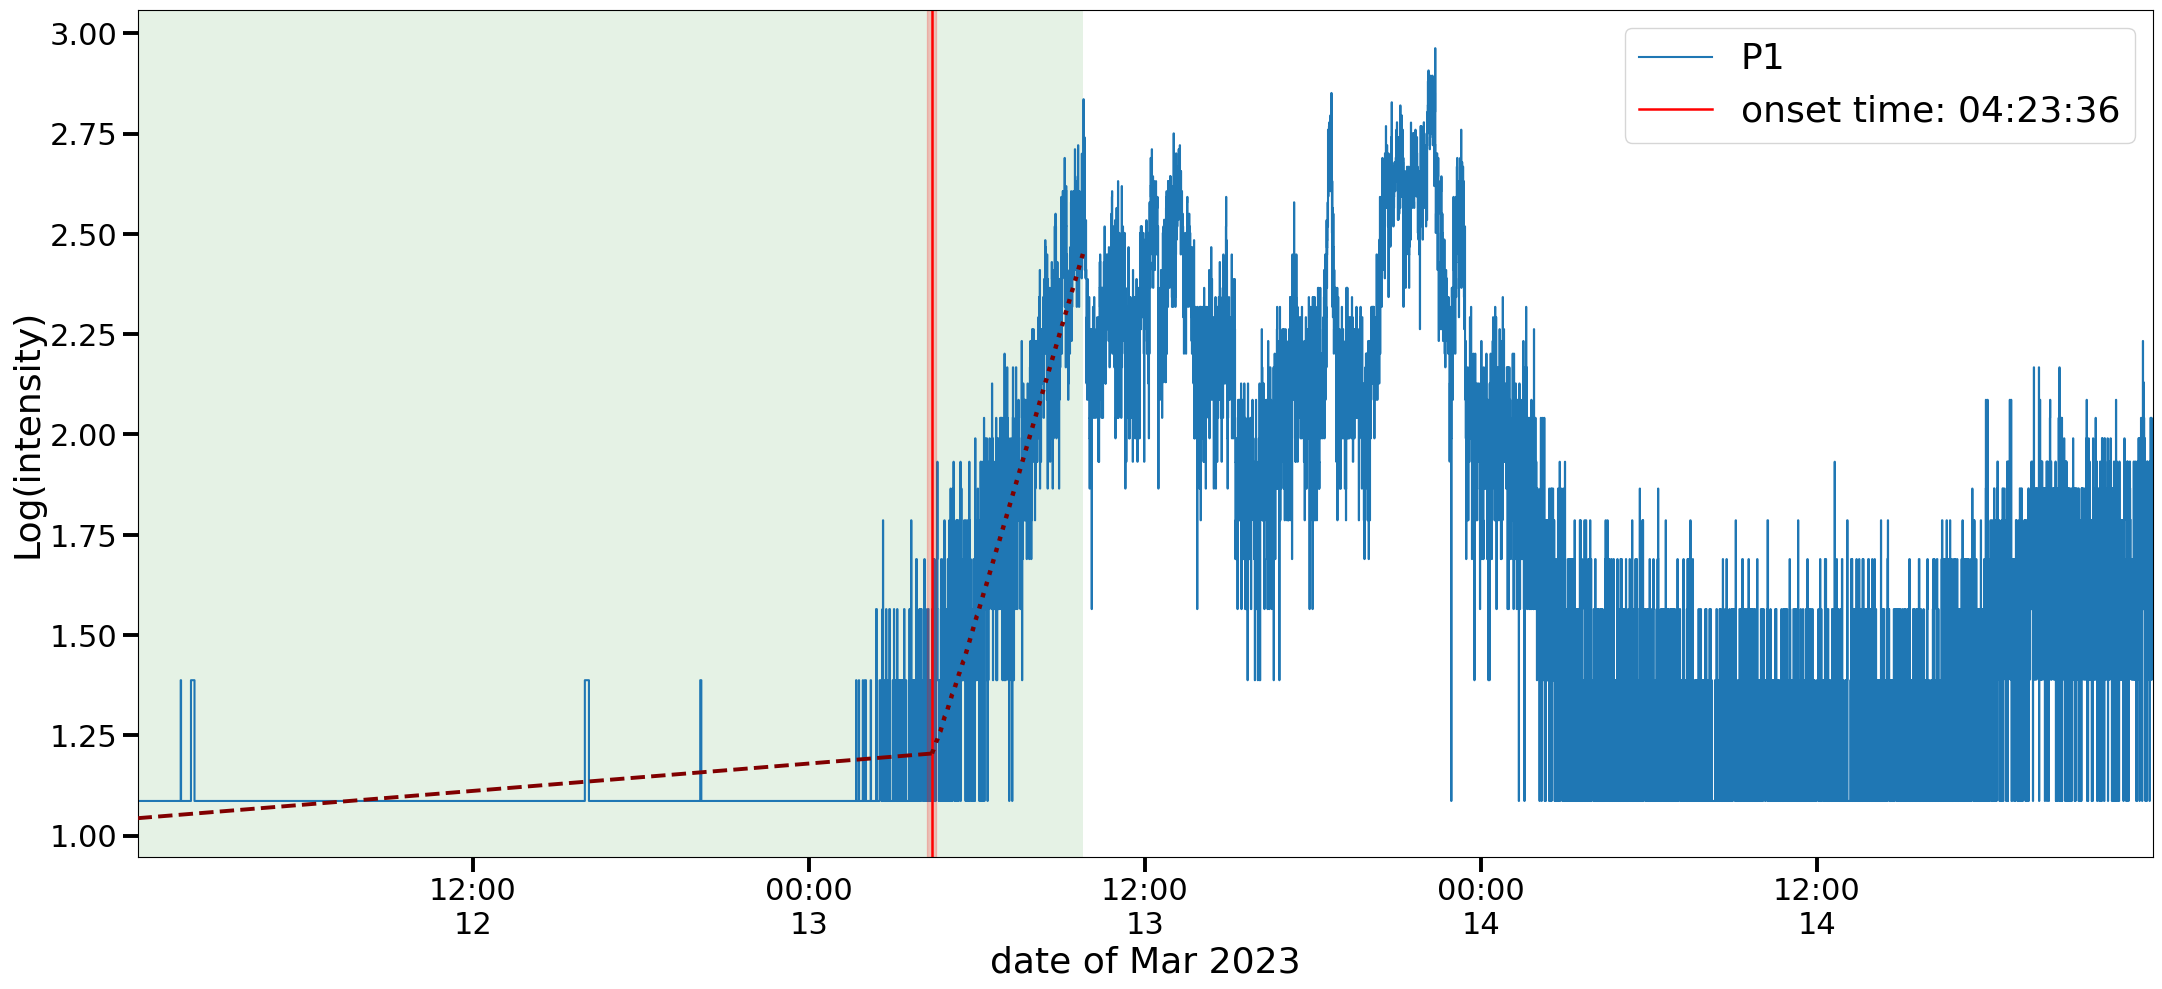

In [5]:
results = reg.workflow(data=df, channel="P1", window=100, threshold=2, diagnostics=True,
                              index_choice="counting_numbers")

In [9]:
results

{'const': np.float64(1.0431977134427444),
 'slope1': np.float64(3.7896524889025125e-05),
 'slope2': np.float64(0.00159438380657475),
 'onset_time': Timestamp('2023-03-13 04:23:36'),
 'onset_time_error_minus': Timestamp('2023-03-13 04:14:24'),
 'onset_time_error_plus': Timestamp('2023-03-13 04:32:48'),
 'line1': 5       1.043387
 15      1.043766
 22      1.044031
 62      1.045547
 73      1.045964
           ...   
 4252    1.204334
 4254    1.204410
 4255    1.204447
 4258    1.204561
 4259    1.204599
 Length: 408, dtype: float64,
 'line2': (4261    1.204599
  4262    1.206195
  4263    1.207792
  4264    1.209388
  4265    1.210985
            ...   
  5068    2.448210
  5069    2.449807
  5070    2.451403
  5071    2.452999
  5072    2.454596
  Length: 784, dtype: float64,),
 'series': (TimeUTC
  2023-03-12 00:02:00    1.086360
  2023-03-12 00:06:00    1.086360
  2023-03-12 00:08:48    1.086360
  2023-03-12 00:24:48    1.086360
  2023-03-12 00:29:12    1.086360
                   

In [6]:
results["series"][0]

TimeUTC
2023-03-12 00:02:00    1.086360
2023-03-12 00:06:00    1.086360
2023-03-12 00:08:48    1.086360
2023-03-12 00:24:48    1.086360
2023-03-12 00:29:12    1.086360
                         ...   
2023-03-13 09:47:12    2.518514
2023-03-13 09:47:36    2.448706
2023-03-13 09:48:00    2.578639
2023-03-13 09:48:24    2.485721
2023-03-13 09:48:48    2.448706
Name: P1, Length: 1192, dtype: float64

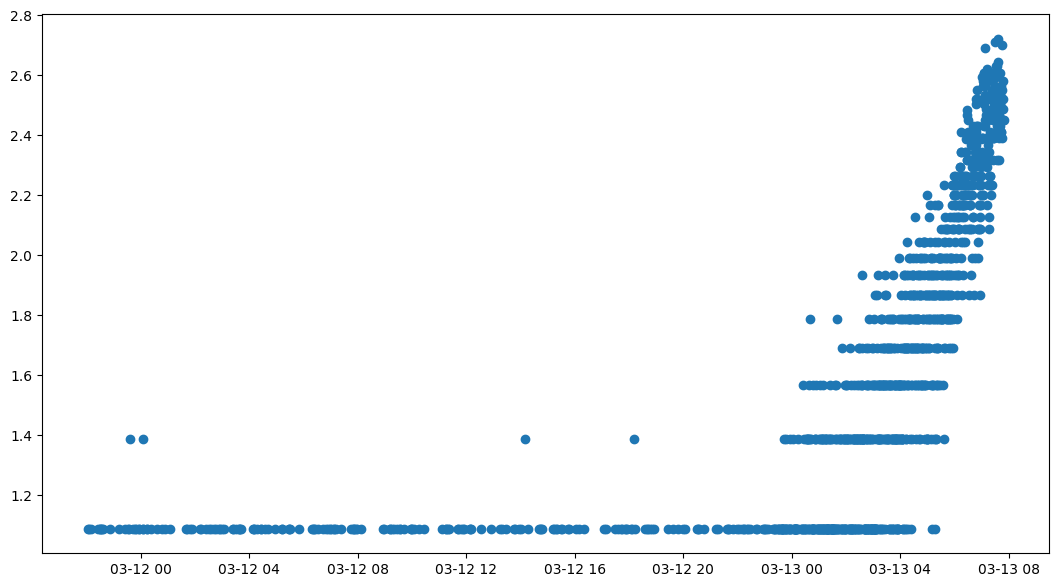

In [24]:
fig, ax = plt.subplots(figsize=(13,7))

ax.scatter(pd.to_datetime(results["indices"], unit='s'), results["series"][0].values)

In [10]:
tresult1 = reg.break_regression(ints=results["series"][0].values, indices=results["indices"])

In [11]:
tresult1["estimates"]

{'const': {'estimate': np.float64(-2624.103959825126),
  'se': np.float64(462.97722519188227),
  'confidence_interval': (np.float64(-3532.4449662039287),
   np.float64(-1715.762953446323)),
  't_stat': np.float64(-5.667889945855454),
  'p_t': np.float64(1.811824796103818e-08)},
 'beta1': {'estimate': np.float64(6.489959830265322e-05),
  'se': np.float64(1.2107367860032303e-06),
  'confidence_interval': (np.float64(6.252418583997276e-05),
   np.float64(6.727501076533367e-05)),
  't_stat': np.float64(53.60339179657176),
  'p_t': '-'},
 'breakpoint1': {'estimate': np.float64(1678674214.5959358),
  'se': np.float64(280.67405980524245),
  'confidence_interval': (np.float64(1678673663.9257429),
   np.float64(1678674765.2661288)),
  't_stat': '-',
  'p_t': '-'},
 'alpha1': {'estimate': np.float64(1.5639174544343432e-06),
  'se': np.float64(2.758042278010548e-07),
  'confidence_interval': (np.float64(1.0228016582080642e-06),
   np.float64(2.1050332506606225e-06)),
  't_stat': np.float64(5.6703

In [16]:
results

{'const': np.float64(-2624.1039598251155),
 'slope1': np.float64(1.5639174544343407e-06),
 'slope2': np.float64(6.646351575708757e-05),
 'onset_time': Timestamp('2023-03-13 02:23:34.595935822'),
 'onset_time_error_minus': Timestamp('2023-03-13 02:14:23.925742865'),
 'onset_time_error_plus': Timestamp('2023-03-13 02:32:45.266128778'),
 'line1': 1678572120    1.044277
 1678572360    1.044653
 1678572528    1.044915
 1678573488    1.046417
 1678573752    1.046829
                 ...   
 1678674024    1.203647
 1678674048    1.203684
 1678674096    1.203759
 1678674120    1.203797
 1678674192    1.203909
 Length: 411, dtype: float64,
 'line2': (1678674216    1.203909
  1678674264    1.203976
  1678674288    1.204042
  1678674312    1.204109
  1678674336    1.204176
                  ...   
  1678693632    1.255817
  1678693656    1.255884
  1678693680    1.255950
  1678693704    1.256017
  1678693728    1.256083
  Length: 785, dtype: float64,),
 'series': (TimeUTC
  2023-03-12 00:02:00   

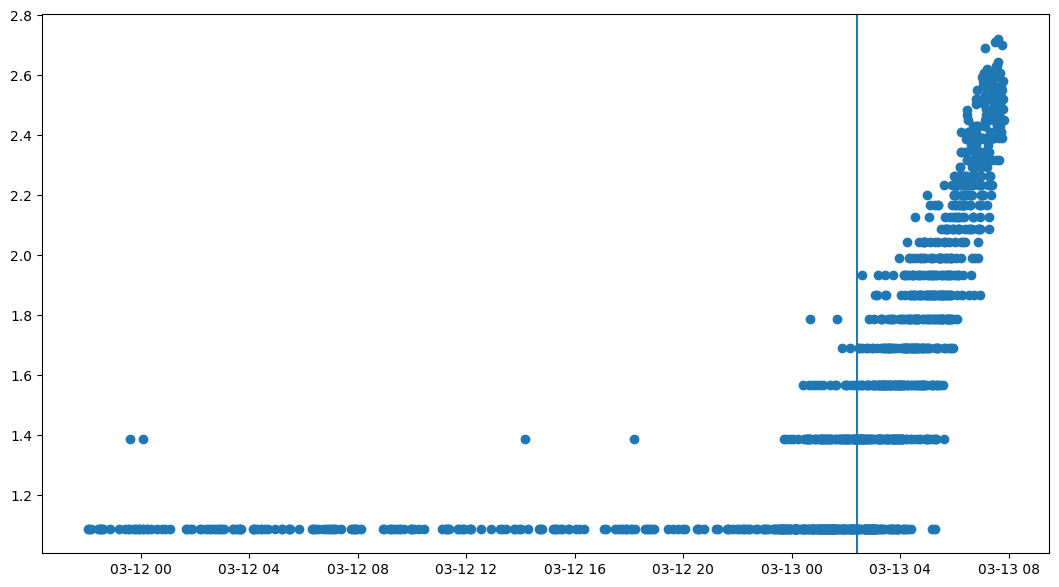

In [25]:
ax.axvline(x=pd.to_datetime(tresult1["estimates"]["breakpoint1"]["estimate"], unit='s'))

fig

In [13]:
pd.to_datetime(tresult1["estimates"]["breakpoint1"]["estimate"], unit='s')

Timestamp('2023-03-13 02:23:34.595935822')

In [26]:
fit1, fit2 = reg.calc_utilities.generate_fit_lines(indices=results["indices"],
                                                  const=tresult1["estimates"]["const"]["estimate"],
                                                  alpha1=tresult1["estimates"]["alpha1"]["estimate"],
                                                  alpha2=tresult1["estimates"]["alpha2"]["estimate"],
                                                  break_point=tresult1["estimates"]["breakpoint1"]["estimate"])

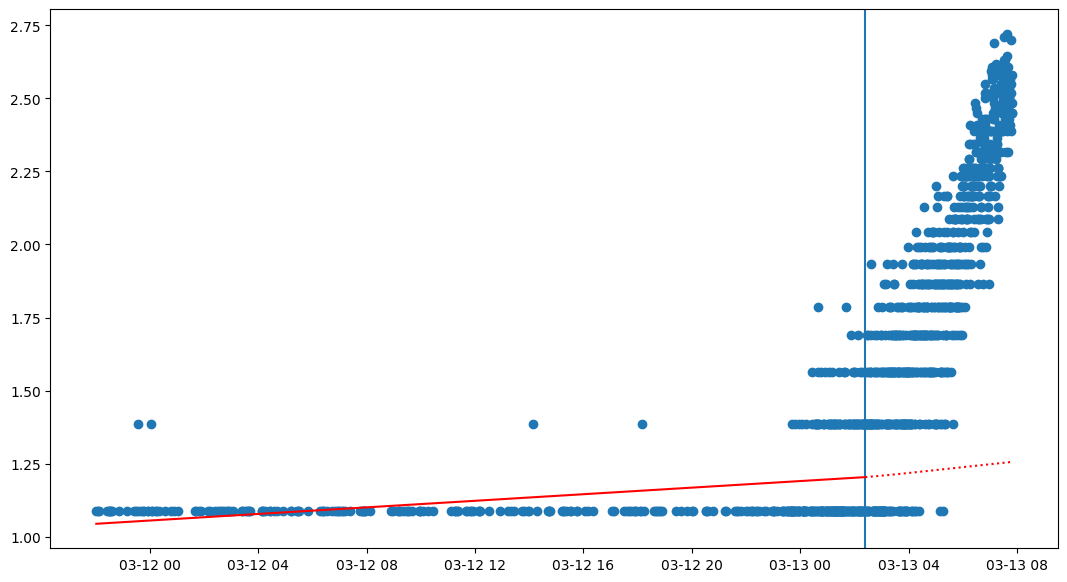

In [27]:
ax.plot(pd.to_datetime(fit1.index, unit='s'), fit1.values, color="red", ls="-")
ax.plot(pd.to_datetime(fit2.index, unit='s'), fit2.values, color="red", ls=":")

fig

In [21]:
pd.to_datetime(fit1.index, unit='s')
#fit1.index

DatetimeIndex(['2023-03-11 22:02:00', '2023-03-11 22:06:00',
               '2023-03-11 22:08:48', '2023-03-11 22:24:48',
               '2023-03-11 22:29:12', '2023-03-11 22:29:36',
               '2023-03-11 22:32:00', '2023-03-11 22:34:24',
               '2023-03-11 22:36:00', '2023-03-11 22:51:36',
               ...
               '2023-03-13 02:17:36', '2023-03-13 02:18:00',
               '2023-03-13 02:18:24', '2023-03-13 02:18:48',
               '2023-03-13 02:19:36', '2023-03-13 02:20:24',
               '2023-03-13 02:20:48', '2023-03-13 02:21:36',
               '2023-03-13 02:22:00', '2023-03-13 02:23:12'],
              dtype='datetime64[ns]', length=411, freq=None)